# _EDA and Models for Abalone Dataset_
>  _created by Spencer Perkins_

Dataset: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

> This notebook is an exploration of the Abalone Dataset (available at the above link), and a few model experiments, one exploring regression for age prediction and the rest for classifying the dataset samples into 5 defined age classes.

## Notebook Structure: 
> ### _EDA_
>> 1. Introduction to dataset
2. Data Cleaning
3. Data Visualization

> ### _Models_
>> 1. Multiple-Linear Regression
2. Logistic Regression
3. Decision Tree
4. Support Vector Machine
5. KNN

> ### _Conclusion_


# _EDA_ 

## 1. Introduction to Dataset

> In this section we will take an initial look at the structure of the dataset. We will be looking for specific issues or aspects that we should consider in the _data cleaning_ section.

In [1]:
# Packages for EDA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Define dataframe
data = pd.read_csv('abalone.csv')
data.shape

(4177, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# Descriptive statistics for the numeric values
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


> This concludes the initial look at the dataset. Some ideas going forward: 
>> 1. The minimum value for 'Height' is 0, which should not be possible. 
2. It may be beneficial to have a numeric representation for 'Sex'. 
3. According to common practice for determining the age of abalones, we could create a class for age in years by adding 1.5 to the number of rings.

## 2. Data Cleaning

> The dataset is complete in that there are no null values present for any of the features. In this section we will deal with the unlikely accurate recording of 0 for the 'Height' feature, add a numeric representation for the 'Sex' feature, add an 'Age' feature, and add an 'Age_class' feature for classification.

In [5]:
# Checking for value 0 in 'Height' column
data[data['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


> Since there are only two samples that have 'Height' recorded as 0, we will simply drop those.

In [6]:
# Drop samples
data.drop(index=[1257, 3996], inplace=True)
data.shape

(4175, 9)

In [7]:
# Check for 0 values in 'Height' column one more time
sum(data['Height']==0)

0

> We will now create a numeric value for the 'Sex' feature.

In [8]:
# Function to create a numeric value for the 'Sex' feature 
def sex_num(x):
    
    """
    M: Male
    F: Female
    I: Infant
    """
    if x == 'M':
        return 0
    elif x == 'F':
        return 1
    elif x == 'I':
        return 2

# Apply function and confirm
data['Sex_num'] = data['Sex'].apply(sex_num)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_num
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


> Next we will add a numeric feature for the age of each sample. According to a PDF from the original data source, the age of an abalone can be calculated by adding 1.5 to the number of rings. This will give you the age in years.

In [9]:
# Function for calculating age
def get_age(x):
    
    """
    Age (years) = #of_rings+1.5
    """
    return x + 1.5

# Apply function and confirm
data['Age'] = data['Rings'].apply(get_age)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_num,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2,8.5


In [10]:
# Statistics for new 'Age' feature
data['Age'].describe()

count    4175.000000
mean       11.435090
std         3.224227
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: Age, dtype: float64

> Next we will create our age categories for model classification. We will create 5 classes. Since the minimum age is 2.5 we will begin counting from 2, and allow for ~6 ages per class (class 0: 2-7, class 1: 8-13, class 2: 14-19, class 3: 20-25, class 4: 26-30.5) 

In [11]:
# Create 'Age_class' feature

# Cut-off point for young class and mid class
young_cut = 7
mid_low_cut = 13
mid_cut = 19
mid_high_cut = 25

def class_var(x):
    
    """ 
    0: younger 
    1: mid-low
    2: mid
    3: mid-high
    4: high
    """
    
    if x <= young_cut:
        return 0
    elif x <= mid_low_cut:
        return 1
    elif x <= mid_cut:
        return 2
    elif x <= mid_high_cut:
        return 3
    else: 
        return 4
    
data['Age_class'] = data['Age'].apply(class_var)
data[['Age_class', 'Age']].sample(10)

,Age_class,Age
2776,1,11.5
3501,2,13.5
2154,1,11.5
842,1,10.5
3995,0,6.5
4160,1,12.5
2506,1,8.5
3429,1,7.5
4004,1,11.5
1309,1,11.5


In [12]:
data['Age_class'].value_counts()

1    3026
2     824
0     189
3     129
4       7
Name: Age_class, dtype: int64

In [13]:
# Confirm value completeness for features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
 9   Sex_num         4175 non-null   int64  
 10  Age             4175 non-null   float64
 11  Age_class       4175 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 424.0+ KB


## 3. Data Visualization 

> First we will visualize some of the distributions for each feature. 

[Text(0.5, 0, 'Age_class'), Text(0, 0.5, 'Number of Samples')]

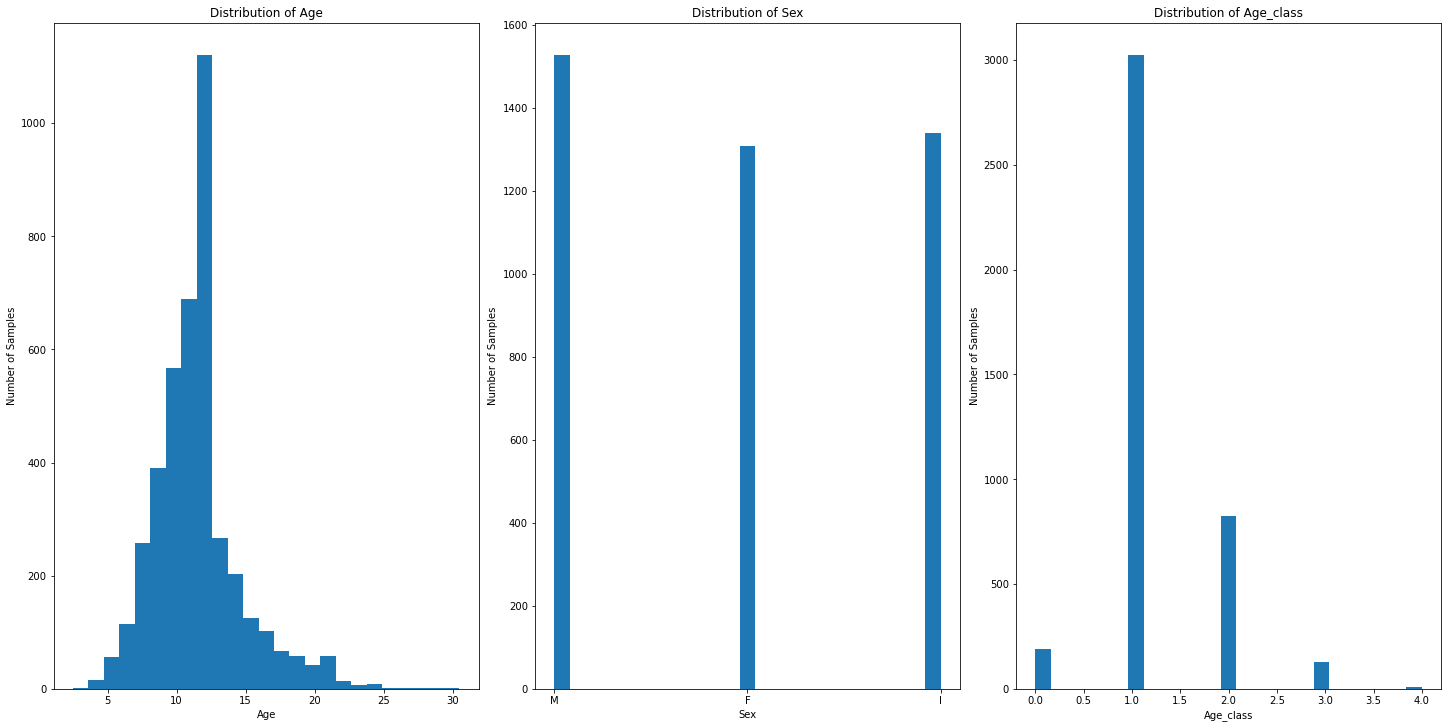

In [14]:
# Histograms for Age and Sex
fig, ax = plt.subplots(1,3, figsize=(20,10), constrained_layout=True)

# Age
ax[0].hist(data['Age'], bins=25)
ax[0].set_title('Distribution of Age')
ax[0].set(xlabel='Age', ylabel='Number of Samples')

# Sex
ax[1].hist(data['Sex'], bins=25)
ax[1].set_title('Distribution of Sex')
ax[1].set(xlabel='Sex', ylabel='Number of Samples')

# Age_class
ax[2].hist(data['Age_class'], bins=25)
ax[2].set_title('Distribution of Age_class')
ax[2].set(xlabel='Age_class', ylabel='Number of Samples')

[Text(0.5, 0, 'Length'), Text(0, 0.5, 'Number of Samples')]

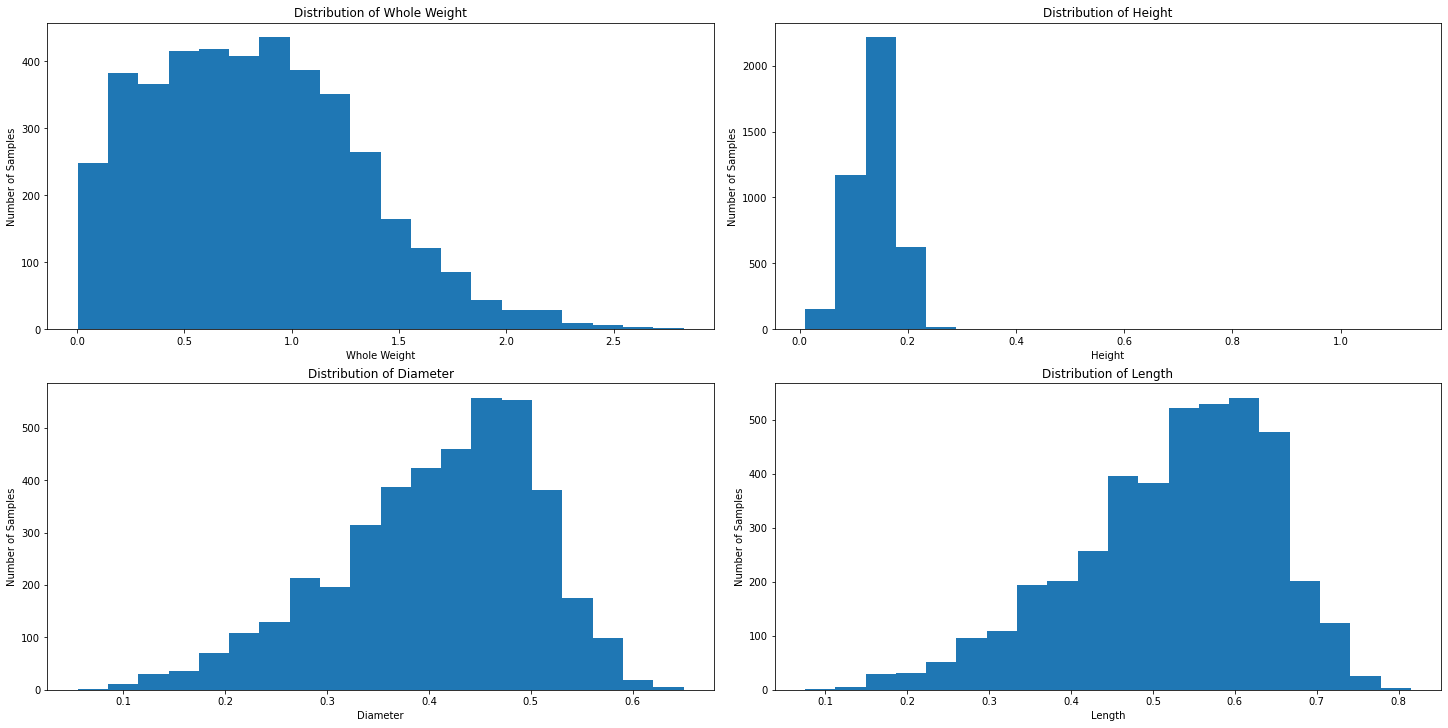

In [15]:
# Histograms for Whole weight, Height, Diameter, Length
fig, ax = plt.subplots(2,2, figsize=(20,10), constrained_layout=True)

# Whole weight
ax[0,0].hist(data['Whole weight'], bins=20)
ax[0,0].set_title('Distribution of Whole Weight')
ax[0,0].set(xlabel='Whole Weight', ylabel='Number of Samples')

#Height
ax[0,1].hist(data['Height'], bins=20)
ax[0,1].set_title('Distribution of Height')
ax[0,1].set(xlabel='Height', ylabel='Number of Samples')

# Diameter
ax[1,0].hist(data['Diameter'], bins=20)
ax[1,0].set_title('Distribution of Diameter')
ax[1,0].set(xlabel='Diameter', ylabel='Number of Samples')

# Length
ax[1,1].hist(data['Length'], bins=20)
ax[1,1].set_title('Distribution of Length')
ax[1,1].set(xlabel='Length', ylabel='Number of Samples')

[Text(0.5, 0, 'Shell weight'), Text(0, 0.5, 'Number of Samples')]

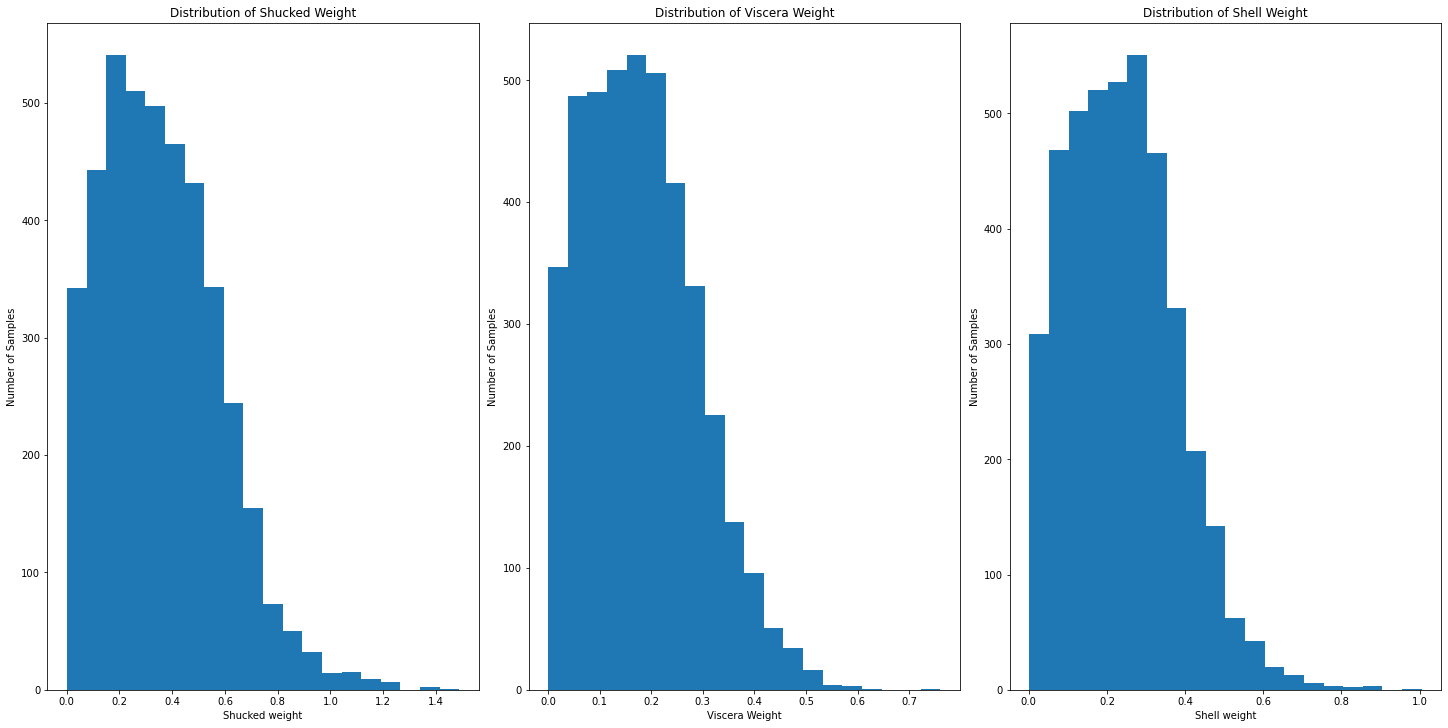

In [16]:
# Histograms for Shucked weight, Viscera weight, Shell weight
fig, ax = plt.subplots(1,3, figsize=(20,10), constrained_layout=True)

# Shucked weight
ax[0].hist(data['Shucked weight'], bins=20)
ax[0].set_title('Distribution of Shucked Weight')
ax[0].set(xlabel='Shucked weight', ylabel='Number of Samples')

# Viscera weight
ax[1].hist(data['Viscera weight'], bins=20)
ax[1].set_title('Distribution of Viscera Weight')
ax[1].set(xlabel='Viscera Weight', ylabel='Number of Samples')

# Shell weight
ax[2].hist(data['Shell weight'], bins=20)
ax[2].set_title('Distribution of Shell Weight')
ax[2].set(xlabel='Shell weight', ylabel='Number of Samples')

> Next we will visualize some of the relationships between features

Text(0.5, 1.0, 'Sex/Age_class')

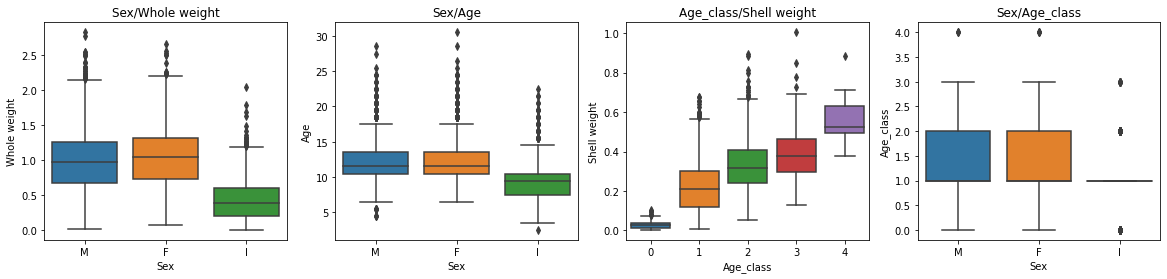

In [17]:
# Boxplots for different features
fig, axs = plt.subplots(ncols = 4, figsize = (20,4))

sns.boxplot(x='Sex', y='Whole weight', data=data, ax=axs[0])
axs[0].set_title('Sex/Whole weight')

sns.boxplot(x='Sex', y='Age', data=data, ax=axs[1])
axs[1].set_title('Sex/Age')

sns.boxplot(x='Age_class', y='Shell weight', data=data, ax=axs[2])
axs[2].set_title('Age_class/Shell weight')

sns.boxplot(x='Sex', y='Age_class', data=data, ax=axs[3])
axs[3].set_title('Sex/Age_class')

Text(0.5, 1.0, 'Age_class/Diameter')

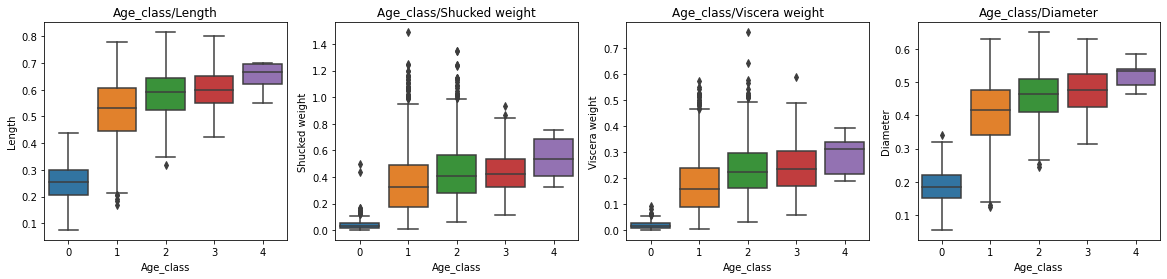

In [18]:
# Boxplots for different features
fig, axs = plt.subplots(ncols = 4, figsize = (20,4))

sns.boxplot(x='Age_class', y='Length', data=data, ax=axs[0])
axs[0].set_title('Age_class/Length')

sns.boxplot(x='Age_class', y='Shucked weight', data=data, ax=axs[1])
axs[1].set_title('Age_class/Shucked weight')

sns.boxplot(x='Age_class', y='Viscera weight', data=data, ax=axs[2])
axs[2].set_title('Age_class/Viscera weight')

sns.boxplot(x='Age_class', y='Diameter', data=data, ax=axs[3])
axs[3].set_title('Age_class/Diameter')

In [19]:
# Check correlation of features
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_num,Age,Age_class
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464,-0.448369,0.556464,0.423051
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418,-0.457873,0.574418,0.438221
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625,-0.417183,0.557625,0.436756
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151,-0.460887,0.540151,0.399569
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597,-0.440598,0.420597,0.286659
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562,-0.454296,0.503562,0.362832
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928,-0.445769,0.627928,0.488589
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000,-0.351483,1.000000,0.882494
Sex_num,-0.448369,-0.457873,-0.417183,-0.460887,-0.440598,-0.454296,-0.445769,-0.351483,1.000000,-0.351483,-0.248537
Age,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000,-0.351483,1.000000,0.882494


# _Models_

> The primary focus of my models for this project is going to be on determining the age of the abalone. First, we will try a linear regression model to predict age. The following models will all be classification models for age classification.

> " The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task" - _Taken from "Data Set Information", https://archive.ics.uci.edu/ml/datasets/abalone_

In [20]:
# Model packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import  KNeighborsClassifier

# Supplemental packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## 0. Data Pre-processing
> We will start by dropping the non-numeric 'Sex' feature and the 'Rings' feature.

In [21]:
data = data.drop(['Sex', 'Rings'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4175 non-null   float64
 1   Diameter        4175 non-null   float64
 2   Height          4175 non-null   float64
 3   Whole weight    4175 non-null   float64
 4   Shucked weight  4175 non-null   float64
 5   Viscera weight  4175 non-null   float64
 6   Shell weight    4175 non-null   float64
 7   Sex_num         4175 non-null   int64  
 8   Age             4175 non-null   float64
 9   Age_class       4175 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 358.8 KB


> We will now check for skewness and handle that before setting our model variables.

In [22]:
# Check for skewness
data.skew().sort_values(ascending = False)

Height            3.166364
Age_class         1.117801
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Sex_num           0.083982
Diameter         -0.610182
Length           -0.640993
dtype: float64

In [23]:
# List of skewed features keys
skewed = ['Height', 'Shucked weight', 'Shell weight', 'Viscera weight', 'Whole weight']

# Take square root
for i in range(len(skewed)):
    name = skewed[i]
    data[name] = np.sqrt(data[name])

# View
data.skew().sort_values(ascending = False)

Age_class         1.117801
Age               1.113754
Sex_num           0.083982
Shucked weight   -0.142020
Height           -0.176012
Viscera weight   -0.184008
Shell weight     -0.222827
Whole weight     -0.237333
Diameter         -0.610182
Length           -0.640993
dtype: float64

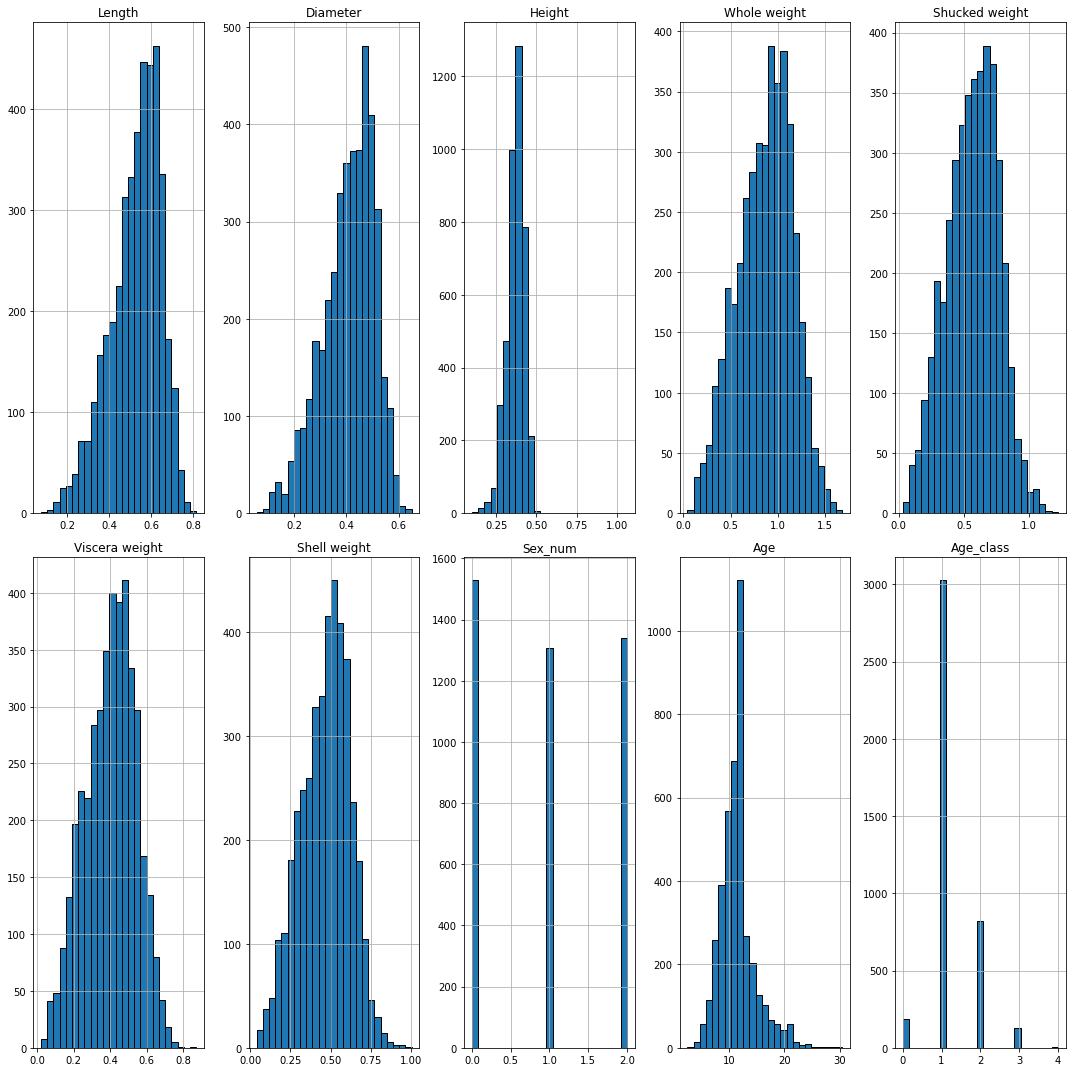

In [24]:
# Final visualization
data.hist(bins=25, figsize=(15,15), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

> We will now create the testing and training variables for the regression and classification models.

In [25]:
# Data for multiple-linear regression model
# Set explanatory (X) and dependent (y) variables
X_lin = data.drop(['Age', 'Age_class'], axis=1)
y_lin = data['Age']

print(f'X_lin shape: {X_lin.shape}')
print(f'y_lin shape: {y_lin.shape}')

X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.5, random_state=0)

# Standardize X data
st_sc = StandardScaler()
X_lin_train = st_sc.fit_transform(X_lin_train)
X_lin_test = st_sc.transform(X_lin_test)

X_lin shape: (4175, 8)
y_lin shape: (4175,)


In [26]:
# Data for Classification models
# Set explanatory (X) and dependent (y) variables
X = data.drop(['Age_class', 'Age'], axis=1)
y = data['Age_class']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Standardize X data
st_sc = StandardScaler()
X_train = st_sc.fit_transform(X_train)
X_test = st_sc.transform(X_test)

X shape: (4175, 8)
y shape: (4175,)


## 1. Multiple-linear Regression

In [27]:
# Define model
model_mlr = LinearRegression()
model_mlr.fit(X_lin_train, y_lin_train)

# Results
train_score = model_mlr.score(X_lin_train, y_lin_train)
test_score = model_mlr.score(X_lin_test, y_lin_test)
intercept = model_mlr.intercept_
predict = model_mlr.predict(X_lin_test)
mse = mean_squared_error(predict, y_lin_test)

# Results
print(f'Training Score: {train_score:.3f}')
print(f'Test Score: {test_score:.3f}')
print(f'Intercept: {intercept:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Regression Score: {r2_score(y_lin_test, predict):.3f}')

Training Score: 0.573
Test Score: 0.539
Intercept: 11.457
Mean Squared Error: 4.512
Regression Score: 0.539


## 2. Logistic Regression

Training Score: 0.784
Testing Score: 0.793


/Users/sonic_tertul/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sonic_tertul/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


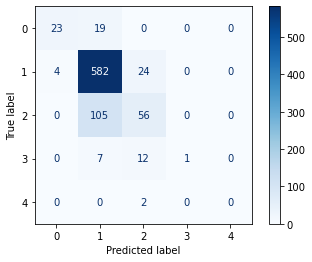

In [28]:
# Define model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Results
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

print(f'Training Score: {train_score:.3f}')
print(f'Testing Score: {test_score:.3f}')

# Confusion matrix
plot_confusion_matrix(model_lr, X_test, y_test, cmap='Blues')  
plt.show()

## 3. Decision Tree

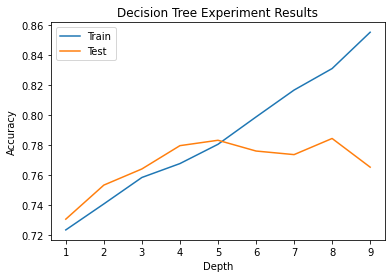

In [29]:
# Variables for tracking training(tr) and testing(ts) accuracy
tr_acc = []
ts_acc = []

# Loop to find best depth
for i in range(1,10):
    model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    model_dt.fit(X_train, y_train)
    tr_acc.append(model_dt.score(X_train, y_train))
    ts_acc.append(model_dt.score(X_test, y_test))
    
# Plot results
plt.plot(range(1,10), tr_acc, label='Train')
plt.plot(range(1,10), ts_acc, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Experiment Results')
plt.legend()

Training Score: 0.781
Testing Score: 0.783


/Users/sonic_tertul/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


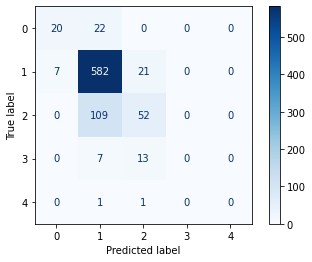

In [30]:
# Define model
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model_dt.fit(X_train, y_train)

# Results
print(f'Training Score: {model_dt.score(X_train, y_train):.3f}')
print(f'Testing Score: {model_dt.score(X_test, y_test):.3f}')

# Confusion matrix
plot_confusion_matrix(model_dt, X_test, y_test, cmap='Blues')  
plt.show()

## 4. Support Vector Machine

/Users/sonic_tertul/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sonic_tertul/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Training Score: 0.774
Testing Score: 0.778


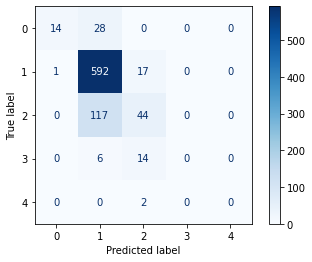

In [31]:
# Define model
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

# Results
print(f'Training Score: {model_svm.score(X_train, y_train):.3f}')
print(f'Testing Score: {model_svm.score(X_test, y_test):.3f}')

# Confusion matrix
plot_confusion_matrix(model_svm, X_test, y_test, cmap='Blues')  
plt.show()

## 5. K-Nearest Neighbors

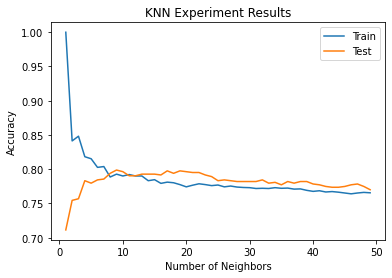

In [32]:
# Variables for tracking training(tr) and testing(ts) accuracy
tr_acc = []
ts_acc = []

# Loop to find best k number
for i in range(1,50):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    tr_acc.append(model_knn.score(X_train, y_train))
    ts_acc.append(model_knn.score(X_test, y_test))
    
# Plot results
plt.plot(range(1,50), tr_acc, label='Train')
plt.plot(range(1,50), ts_acc, label='Test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Experiment Results')
plt.legend()

Training Score: 0.790
Testing Score: 0.796


/Users/sonic_tertul/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


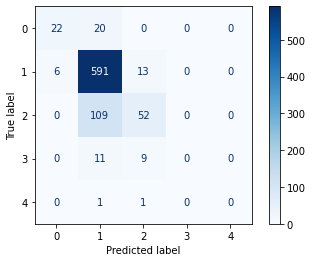

In [33]:
# Define model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)

# Results
print(f'Training Score: {model_knn.score(X_train, y_train):.3f}')
print(f'Testing Score: {model_knn.score(X_test, y_test):.3f}')

# Confusion matrix
plot_confusion_matrix(model_knn, X_test, y_test, cmap='Blues')  
plt.show()

# _Conclusion_

> Of the five models tested, age prediction with multiple linear regression had the weakest performance, with a regression score of  about 54%. The classifiers were able to score better (~ 77 - 79%), however, there are some key takeaways from these experiments: 
>> 1. Due to a high concentration of ages in the range 9-13, the choice of age categories is very important. In this experiment we used a fairly symmetrical approach to creating age cut-offs, which led to class 1 containing significantly more samples. I tried few other methods prior to settling on this approach, such as using only 3 categories (low, mid, high) and using a non-symmetrical approach to age cut-offs to further split the 9-13 range.

>> 2. Based on some of our data visualizations, there appears to be some potential outliers. Further experimentation with dealing with those could lead to better classification. 

>> 3. Adjusting the train/test split ratio does have a noticeable effect on the classification accuracy (less so on regression), with a 80/20 and 70/30 split both seeing an increase in overall accuracy from a 50/50 split. However, the classification of classes 3, 4 is still not corrected. 